 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [1]:
import pandas as pd

In [2]:
ls

Untitled.ipynb                         evaluate_predictions.py
emos_network_train_2015_pred_2016.csv  obs.csv


In [3]:
obs_df = pd.read_csv('obs.csv')
pred_df = pd.read_csv('emos_network_train_2015_pred_2016.csv')

In [5]:
obs_df.head()

,Unnamed: 0,date,obs,station
0,0,2016-01-01,4.3,44.0
1,1,2016-01-01,3.3,71.0
2,2,2016-01-01,-0.8,73.0
3,3,2016-01-01,3.2,78.0
4,4,2016-01-01,3.5,91.0


In [6]:
pred_df.head()

,Unnamed: 0,date,mean,station_id,std
0,0,2016-01-01,4.442505,44.0,1.651832
1,1,2016-01-01,1.637181,71.0,2.386799
2,2,2016-01-01,0.611089,73.0,1.772206
3,3,2016-01-01,4.397912,78.0,1.700036
4,4,2016-01-01,1.966224,91.0,2.544652


In [7]:
len(obs_df)

182218

In [8]:
len(pred_df)

182218

In [14]:
obs_df = obs_df.sort_values(['date', 'station'])
pred_df = pred_df.sort_values(['date', 'station_id'])

In [16]:
obs_df['date'] == pred_df['date']

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
          ... 
182188    True
182189    True
182190    True
182191    True
182192    True
182193    True
182194    True
182195    True
182196    True
182197    True
182198    True
182199    True
182200    True
182201    True
182202    True
182203    True
182204    True
182205    True
182206    True
182207    True
182208    True
182209    True
182210    True
182211    True
182212    True
182213    True
182214    True
182215    True
182216    True
182217    True
Name: date, Length: 182218, dtype: bool

In [17]:
from pandas.util.testing import assert_frame_equal

In [21]:
obs_df['date'].equals(pred_df['date'])

True

In [22]:
obs_df['station'].equals(pred_df['station_id'])

True

In [23]:
obs_df = obs_df.sort_values(['station', 'date'])

In [24]:
obs_df['date'].equals(pred_df['date'])

False

In [25]:
obs_df = obs_df.sort_values(['date', 'station'])

In [28]:
from scipy.stats import norm
import numpy as np
def crps_normal(mu, sigma, y):
    """
    Compute CRPS for a Gaussian distribution. 
    """
    loc = (y - mu) / sigma
    crps = sigma * (loc * (2 * norm.cdf(loc) - 1) + 
                    2 * norm.pdf(loc) - 1. / np.sqrt(np.pi))
    return crps

In [30]:
np.mean(crps_normal(pred_df['mean'], pred_df['std'], obs_df['obs']))

1.011747631876825

In [2]:
ls 

crps.csv                               evaluate_predictions.py
dataframe_tests.ipynb                  obs.csv
emos_network_train_2015_pred_2016.csv


In [2]:
crps_df = pd.read_csv('crps.csv', index_col=0)
crps_df

,crps,name
0,1.156820,raw_ensemble
1,1.020197,emos_network_rolling_window
2,1.012283,emos_network_train_2015_pred_2016
3,1.005431,fc_network_rolling_window
4,1.011311,fc_network_train_2015_pred_2016
5,1.014767,hidden_nn_train_2015_pred_2016
6,0.912454,embedding_nn_train_2015_pred_2016
7,0.936979,hidden_nn_aux_train_2015_pred_2016
8,0.857939,embedding_nn_aux_train_2015_pred_2016


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

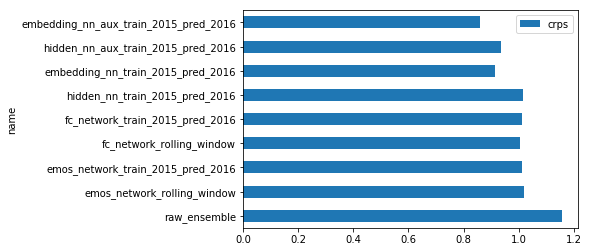

In [10]:
crps_df.plot.barh(x='name', y='crps')


In [10]:
%qtconsole

In [14]:
ref = crps_df['crps'][0]

In [19]:
crps_df.loc[:, 'improvement %'] = (ref - crps_df['crps'])  / ref * 100

In [20]:
crps_df

,crps,name,improvement %
0,1.156820,raw_ensemble,0.000000
1,1.020197,emos_network_rolling_window,11.810252
2,1.012283,emos_network_train_2015_pred_2016,12.494324
3,1.005431,fc_network_rolling_window,13.086633
4,1.011311,fc_network_train_2015_pred_2016,12.578399
5,1.014767,hidden_nn_train_2015_pred_2016,12.279625
6,0.912454,embedding_nn_train_2015_pred_2016,21.123998
7,0.936979,hidden_nn_aux_train_2015_pred_2016,19.003944
8,0.857939,embedding_nn_aux_train_2015_pred_2016,25.836483


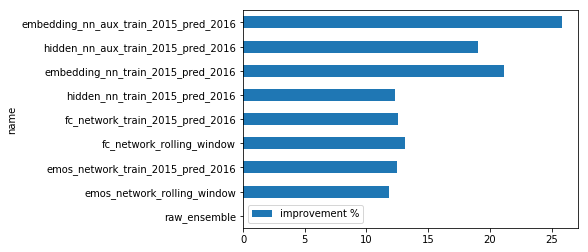

In [32]:
crps_df.plot.barh(x='name', y='improvement %')

In [33]:
import seaborn as sns

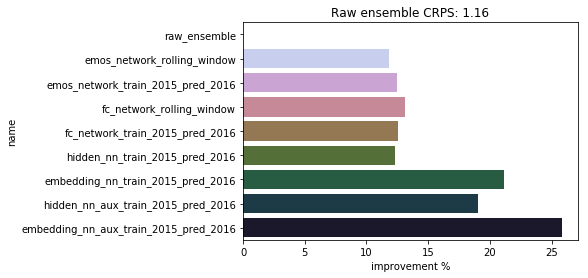

In [38]:
sns.barplot(y='name', x='improvement %', data=crps_df, palette='cubehelix_r')
plt.title('Raw ensemble CRPS: %.2f' % ref)